# 说明

这是在运行代码中一些使用单行运行的代码的合集

## 2.1

In [2]:
from keras.datasets import mnist
print(help(mnist))

Using TensorFlow backend.


Help on module keras.datasets.mnist in keras.datasets:

NAME
    keras.datasets.mnist - MNIST handwritten digits dataset.

FUNCTIONS
    load_data(path='mnist.npz')
        Loads the MNIST dataset.
        
        # Arguments
            path: path where to cache the dataset locally
                (relative to ~/.keras/datasets).
        
        # Returns
            Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.

DATA
    absolute_import = _Feature((2, 5, 0, 'alpha', 1), (3, 0, 0, 'alpha', 0...
    division = _Feature((2, 2, 0, 'alpha', 2), (3, 0, 0, 'alpha', 0), 8192...
    print_function = _Feature((2, 6, 0, 'alpha', 2), (3, 0, 0, 'alpha', 0)...

FILE
    d:\anaconda3\lib\site-packages\keras\datasets\mnist.py


None


In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


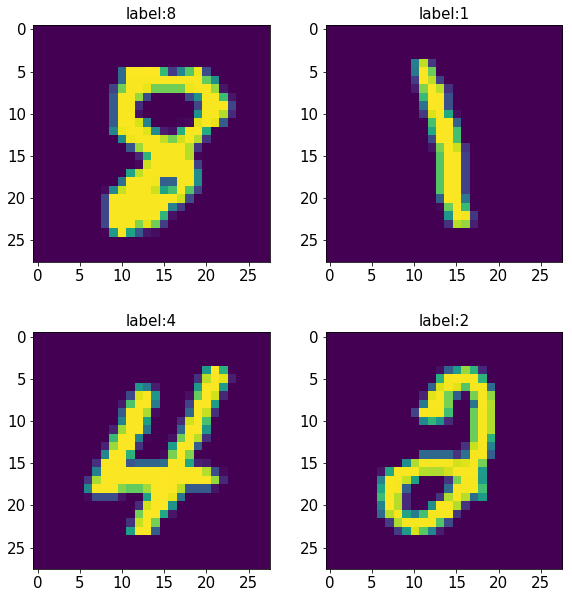

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# 载入数据集，并且输出维度大小
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 随机提取四副图片
index = np.random.randint(0, 60000, 4)

# 绘制四副图片
plt.figure(figsize=(10, 10))                         # 设置图片画布大小
plt.subplots_adjust(wspace = 0.1, hspace = 0.3)      # 设置子图间隔大小
for i in range(4):
    plt.subplot(2,2,i+1)
    title = 'label:'+str(train_labels[index[i]])     # 中间的+号表示字符串拼接，真是神奇啊
    plt.title(title, fontsize = 15)                  # 设置图片标题以及字体大小
    plt.xticks(fontsize = 15)                        # 设置x刻度大小
    plt.yticks(fontsize = 15)                        # 设置y刻度大小
    plt.imshow(train_images[index[i],:,:]) 
plt.show()

In [45]:
# 2-1-Mnist.py
from keras.datasets import mnist       
from keras.utils import to_categorical 
from keras import models			  
from keras import layers             

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
 				loss='categorical_crossentropy',
 				metrics=['accuracy'])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images  = test_images.reshape((10000, 28 * 28))
test_images  = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels  = to_categorical(test_labels)

network.fit(train_images, train_labels, epochs=5, batch_size=128)

test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Epoch 1/5
60000/60000 [==============================] - 60s 1ms/step - loss: 0.2579 - acc: 0.9258
Epoch 2/5
60000/60000 [==============================] - 61s 1ms/step - loss: 0.1038 - acc: 0.9693
Epoch 3/5
60000/60000 [==============================] - 76s 1ms/step - loss: 0.0695 - acc: 0.9783
Epoch 4/5
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0501 - acc: 0.9855
Epoch 5/5
10000/10000 [==============================] - 19s 2ms/step
test_acc: 0.9774


In [42]:
print(help(to_categorical))

Help on function to_categorical in module keras.utils.np_utils:

to_categorical(y, num_classes=None, dtype='float32')
    Converts a class vector (integers) to binary class matrix.
    
    E.g. for use with categorical_crossentropy.
    
    # Arguments
        y: class vector to be converted into a matrix
            (integers from 0 to num_classes).
        num_classes: total number of classes.
        dtype: The data type expected by the input, as a string
            (`float32`, `float64`, `int32`...)
    
    # Returns
        A binary matrix representation of the input. The classes axis
        is placed last.

None


In [45]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [46]:
train_labels = to_categorical(train_labels)
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [47]:
train_labels.shape

(60000, 10)

In [ ]:
# 载入必须的库
from keras.datasets import mnist       # 这是数据集
from keras.utils import to_categorical # 这是用于分类的工具
from keras import models               # 模型
from keras import layers               # 层
import matplotlib.pyplot as plt        # 绘图工具

# 提取原始数据，以下是固定的形式，由mnist数据集决定
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 数据预处理
train_images = train_images.reshape((60000, 28 * 28)) # 改为二维数组
train_images = train_images.astype('float32') / 255   # 归一化
test_images  = test_images.reshape((10000, 28 * 28))  # 改为二维数组
test_images  = test_images.astype('float32') / 255    # 归一化

# 将类向量（整数）转换为二进制类矩阵
train_labels = to_categorical(train_labels)  # 分类编码
test_labels  = to_categorical(test_labels)   # 分类编码

# 留出验证集（这里是新增加的内容）
x_val 			= train_images[:10000] # 验证集：前10000个
partial_x_train = train_images[10000:] # 训练集：10000至60000个
y_val 			= train_labels[:10000] # 验证集：前10000个
partial_y_train = train_labels[10000:] # 训练集：10000至60000个

# 建立网络模型
network = models.Sequential()  		   # 顺序模型
# 第一层：全连接层，512路relu激活函数
network.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28,)))   
# 第二层：全连接层，10路softmax激活函数
network.add(layers.Dense(10, activation = 'softmax'))							

# 配置训练模型
network.compile(optimizer = 'rmsprop',                  # 优化器，rmsprop
 				loss      = 'categorical_crossentropy', # 代价函数, 交叉熵
 				metrics   =['accuracy'])                # 评估指标，精度

# 进行网络训练
history = network.fit(partial_x_train, partial_y_train, epochs=5, batch_size=128, 						  validation_data=(x_val, y_val))   # 5轮次，每一批128个

# 查看测试集结果
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

# 作图
history_dict    = history.history
loss_values     = history_dict['loss']
val_loss_values = history_dict['val_loss 
epochs = range(1, len(loss_values) + 1) # 初始化迭代轮次向量
plt.figure(1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history_dict['acc'] 
val_acc = history_dict['val_acc']
plt.figure(2)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [55]:
import numpy as np
np.array([1, 2, 3]).dot(np.array([2, 3, 4]))

20

In [56]:
28*28

784

In [57]:
print('sdaf'+'dsafd')

sdafdsafd


In [61]:
print(''.join(['asdf', 'asdf']))

asdfasdf
